Autor: __Mariano Zibecchi__

# Laboratorio: Curando un Dataset

## ¿A dónde realizan su primera reserva los nuevos usuarios de Airbnb?

Durante este práctico vamos a trabajar sobre el dataset [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data) de Kaggle.

Airbnb nos ofrece una lista de usuarios (todos de EEUU) junto con sus datos demográficos, registros de sesiones web y algunas estadísticas extras. Hay 12 posibles resultados del país de destino:  __US__, __FR__, __CA__, __GB__, __ES__, __IT__, __PT__, __NL__, __DE__, __AU__, __NDF__ (no se ha encontrado ningún destino), y __other__. 

Las variables con las que trabaja el dataset son:
 * __id__: identificación de usuario.
 * __date_account_created__: fecha de la creación de la cuenta.
 * __timestamp_first_active__: timestamp de primera actividad.
 * __date_first_booking__: fecha de primer viaje.
 * __gender__: género.
 * __age__: edad.
 * __signup_method__: método de registración.
 * __signup_flow__: la página desde la cual un usuario vino a registrarse.
 * __language__: preferencia de idioma internacional.
 * __affiliate_channel__: tipo de marketing pagado.
 * __affiliate_provider__: de donde es el marketing.
 * __first_affiliate_tracked__: seguimiento previo a la registración.
 * __signup_app__: aplicación de registración.
 * __first_device_type__: tipo de dispositivo.
 * __first_browser__: búscador.
 * __country_destination__: país escogido para realizar un viaje.

## Objetivo y alcance:

En este laboratorio realizaremos un trabajo de curación sobre el dataset de Airbnb, una tarea fundamental antes de querer comenzar a aplicar conceptos de aprendizaje automático. Para poder definir un método o "receta" de curación, hemos definido una lista de pasos a seguir para llevar a cabo la curación de cualquier dataset:

  1. Verificar que no hay problemas en la importación.
  2. Asegurar de tener IDs/claves únicas.
  3. Despersonalizar datos y guardarlos en un nuevo archivo.
  4. Nunca modificar los datos crudos u originales.
  5. Etiquetas de variables/columnas: no usar caracteres especiales.
  6. Tratar valores faltantes.
  7. Codificar variables.
  8. No cambiar los nombres de las variables de la fuente de origen.
  9. Verificar la consistencia de las variables.
  10. Identificar y documentar valores atípicos/outliers.
  11. Evaluar cómo comprimir los datos.
  12. Guardar el set de datos con un nombre informativo.
 
Siguiendo los pasos anteriores, uno puede curar cualquier conjunto de datos, con la seguridad de que estamos haciendo las cosas de una manera coherente.


## Estructura del informe:

  * Jupyter Notebook con el análisis realizado.
  
---

## 1. Verificar que no hay problemas en la importación

Comenzamos importando la librería __pandas__.

In [49]:
import pandas as pd

También importamos la librería __warnings__ para que no se muestren los avisos de warning, sólo para una comodidad visual.

In [14]:
import warnings
warnings.filterwarnings('ignore')

Luego, leemos el dataset __data.cvs__ y luego lo mostramos

In [15]:
# para optimizar, anulamos esta llamada, porque la volvemos a hacer mas adelante
#data = pd.read_csv("../Datos/data.csv") #Path a los datos
#data.head()

Como vemos, no obtuvimos ningún error a la hora de la lectura del conjunto de datos, lo que es un buen comienzo.

Además, podemos observar que el dataset está formado por 213451 filas y 16 columnas
***

Seteamos la semillla para reproducibilidad.

In [16]:
import numpy as np
np.random.seed(0)

Mostramos __aleatoriamente__ 5 muestras del dataset.

In [17]:
data.sample(5)

NameError: name 'data' is not defined

In [18]:
data.dtypes

NameError: name 'data' is not defined

Los campos __objects__ generalmente son __strings__. En nuestro caso, no se reconocieron como fechas a __date_account_created__, __timestamp_first_active__, __date_first_booking__, lo cual ya lo observamos en el laboratorio de visualización.

Veamos un resumen de los datos, incluyendo todos los tipos de datos __numéricos__ y __categóricos__.

In [19]:
data.describe(include='all')

NameError: name 'data' is not defined

* __TO DO__: Indicamos explícitamente aquellas columnas que son fechas y no fueron detectadas como tales. Luego chequeamos que el cambio aplicado se haya reflejado en el dataset.

In [20]:
# para optimizar, anulamos esta llamada, porque la volvemos a hacer mas adelante
#data = pd.read_csv("../Datos/data.csv",
#                   parse_dates=["date_account_created","timestamp_first_active", "date_first_booking"]) 
#data.head()

* __TO DO__: Ahora deberíamos poder calcular los rangos de las distintas fechas: __date_account_created__, __timestamp_first_active__, __date_first_booking__.

In [21]:
data.dtypes

NameError: name 'data' is not defined

In [22]:
data.describe(include='all')

NameError: name 'data' is not defined

# 2. Asegurar de tener IDs/claves únicas

In [23]:
data.shape

NameError: name 'data' is not defined

* __TO DO__: Definimos como índice del dataset a la columna __id__.

In [24]:
data = pd.read_csv("../Datos/data.csv",
                   parse_dates=["date_account_created","timestamp_first_active", "date_first_booking"],
                  index_col=["id"]) 
data.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [25]:
data.shape

(213451, 15)

* __TO DO__: Chequear que no existan "ids" duplicados.

In [26]:
data[ data.duplicated() ]

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,


## 1.3. Despersonalizar datos y guardarlos en un nuevo archivo

Cualquier dataset con información sensible de usuarios, como por ejemplo: Nombres, DNI, lugar de residencia de las personas, etc, deben de manejar con mucha precaución. Para más información [Reglamento General de Protección de Datos](https://es.wikipedia.org/wiki/Reglamento_General_de_Protecci%C3%B3n_de_Datos)

* __TO DO__: ¿Nuestro dataset tiene alguna información sensible que deba de ser despersonalizada? En caso de ser así, tenemos que despersonalizarlo. 

In [ ]:
data.describe(include='all')

No existen datos sensibles.

* __TO DO__: Si considerás que el dataset es seguro, a modo de práctica despersonaliza una columna cualquiera.

In [ ]:
from hashlib import md5

In [ ]:
data_with_hash = data.copy(deep=True)
data_with_hash.head()

In [ ]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

In [ ]:
# hay que asignar, pq el .apply retorna una nueva serie...
data_with_hash['signup_method'] = data_with_hash['signup_method'].apply(hashit)

Guardo el archivo con los datos despersonalizados.

In [ ]:
data_with_hash.to_csv("../Datos/data_with_hash.csv")

## 4. Nunca modificar los datos crudos u originales

In [ ]:
data.to_csv("../Datos/data_original.csv")

## 5. Etiquetas de variables/columnas: no usar caracteres especiales

In [ ]:
data.describe(include='all')

Se importan librerías útiles para el manejo de __encodings__.

In [ ]:
import chardet
import string

¿Cúales son los caracteres "normales"? 

In [ ]:
string.ascii_letters + string.digits

En particular, Python 3 utiliza __UTF-8__ por defecto.

Vamos a averiguar el enconding de nuestro dataset.

In [ ]:
with open("../Datos/data.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)

* __TO DO__: Volviendo a la consigna original, chequeamos que no haya caracteres fuera de __a-Z__, __0-9__

In [ ]:
data.columns[ ~data.columns.str.match(r'^(\w+)$') ]

* __TO DO__: Reemplazar espacios por _.

no existen columnas con espacio en blanco

## 6. Tratar valores faltantes

Vamos a ver cuantos valores nulos tenemos.

In [27]:
missing_values_count = data.isnull().sum()
#missing_values_count[missing_values_count > 0]
missing_values_count

date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

* __TO DO__: Calcular el porcentaje de datos faltantes por columna. Ejemplo:

In [35]:
nonblank_values_count = data.notnull().sum() 
nonblank_values_count

date_account_created       213451
timestamp_first_active     213451
date_first_booking          88908
gender                     213451
age                        125461
signup_method              213451
signup_flow                213451
language                   213451
affiliate_channel          213451
affiliate_provider         213451
first_affiliate_tracked    207386
signup_app                 213451
first_device_type          213451
first_browser              213451
country_destination        213451
dtype: int64

In [36]:
percentage_null = (missing_values_count / len(data))*100
percentage_null

date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

* __TO DO__: ¿Existen algunas columnas donde las casillas vacías son demasiadas, tanto que se aproximan al número total de muestras del dataset? Si es así, debemos proceder a obviarlas, en lugar de reemplazar los valores faltantes con algún otro valor.

La columna __date_first_booking__ tiene un 58% de sus valores nulos. Esto es así porque son usuarios que no han hecho ninguna reserva todavia. Si el dataset es consistente, la cantidad de valores nulos en ese campo debería ser igual a la cantidad de valores de __country_destination__ iguales a NDF.

In [37]:
len(data[ data.country_destination=="NDF"]) == missing_values_count.date_first_booking

True

En el caso de la columna __age__, el caso es distinto. Aquí tenemos 41% de registros con __age__ en valores nulos. Aqui deberiamos emplear alguna estrategia de reemplazo.

In [38]:
data.age.fillna( data.age.mean(), inplace=True)
data.age.head()

id
gxn3p5htnn    49.668335
820tgsjxq7    38.000000
4ft3gnwmtx    56.000000
bjjt8pjhuk    42.000000
87mebub9p4    41.000000
Name: age, dtype: float64

Analicemos la variable __gender__

In [39]:
data.gender.describe()

count        213451
unique            4
top       -unknown-
freq          95688
Name: gender, dtype: object

In [40]:
data.gender.unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [41]:
data.groupby('gender').gender.count()

gender
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

* __TO DO__: Dentro de los valores que quedan, se puede observar que para algunas categorías existe una gran cantidad de valores faltantes y eliminar estas filas sería perder mucha información. Pero para las categorías donde las filas de valores faltantes no representan mucho respecto al tamaño del dataset, directamente las podemos descartar.

Creo que esto no aplica en nuestro dataset.
Las únicas columnas con valores nulos son __age__ y __date_first_booking__, y ya describimos que accion tomar en esos casos.

* __TO DO__: Finalmente para las categorías que no deseamos borrar filas para no perder datos, debemos reemplazar los valores faltantes por algún valor, como por ejemplo: 0 en caso de columnas numéricas, None para strings (tipo object) y la fecha más común para el caso de las fechas. Una vez hecho esto hemos logrado sacar todos los valores faltantes.

Ya reemplazamos en los nulos de age por la media de age.
Veamos que otros casos hay...

In [42]:
missing_values_count = data.isnull().sum()
missing_values_count[missing_values_count > 0]

date_first_booking         124543
first_affiliate_tracked      6065
dtype: int64

In [45]:
data.first_affiliate_tracked.unique()

array(['untracked', 'omg', 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

La ocurrencia de nan en la columna __first_affiliate_tracked__ es muy baja (2%).
Reemplazamos los nan por 'untracked'

In [44]:
data.first_affiliate_tracked.fillna( 'untracked', inplace=True)
data.first_affiliate_tracked.head()

id
gxn3p5htnn    untracked
820tgsjxq7    untracked
4ft3gnwmtx    untracked
bjjt8pjhuk    untracked
87mebub9p4    untracked
Name: first_affiliate_tracked, dtype: object

In [46]:
missing_values_count = data.isnull().sum()
missing_values_count[missing_values_count > 0]

date_first_booking    124543
dtype: int64

El unico caso que queda es el de __date_first_booking__.

## 7. Codificar variables

Las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas.

In [21]:
from sklearn import preprocessing

In [22]:
data.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Debido a la cantidad de columnas con que cuenta nuestro Dataset se cambiarán solo algunas columnas categóricas a modo de ejemplo, puede observarse al final como estas columnas han pasado a ser numéricas:

In [53]:
from sklearn import preprocessing

column1='gender'
le1 = preprocessing.LabelEncoder()
le1.fit(data[column1])
print(dict(zip(le1.classes_,le1.transform(le1.classes_))))
data[column1] = le1.transform(data[column1]) 
data.head()

{'OTHER': 3, 'MALE': 2, '-unknown-': 0, 'FEMALE': 1}


,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,0,49.668335,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,2,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,1,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,1,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,0,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


En caso de un análisis para un caso real que se necesitan limpiar los datos este último proceso deberá realizarse para todas las columnas categóricas. Ahora guardaremos el último dateset procesado que hemos obtenido ya que revertiremos el cambio de las variables categóricas para continuar el análisis (en caso de una aplicación real no deberíamos invertirlo ya que necesitamos a las columnas categóricas como números):

In [54]:
data.to_csv("../Datos/Data_cat2num.csv")

In [55]:
data[column1] = le1.inverse_transform(data[column1])
data.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,49.668335,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## 8. No cambiar los nombres de las variables de la fuente de origen

Lo único que hicimos fue eliminar los caracteres especiales. El resto mantiene los mismos nombres :)

## 9. Verificar la consistencia de las variables

In [56]:
data.head(5)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,49.668335,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.000000,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Por ejemplo: ¿Existen edades mayores a 150?

In [57]:
data[(data.age > 150)]

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
v2x0ms9c62,2010-04-11,2010-04-11 06:56:02,2010-04-13,-unknown-,2014.0,basic,3,en,other,craigslist,untracked,Web,Windows Desktop,Firefox,FR
umf1wdk9uc,2010-05-25,2010-05-25 15:55:41,NaT,FEMALE,2014.0,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
m82epwn7i8,2010-07-14,2010-07-14 23:05:56,2010-07-15,MALE,2014.0,facebook,0,en,other,craigslist,untracked,Web,Mac Desktop,Chrome,US
2th813zdx7,2010-07-25,2010-07-25 23:44:19,2010-07-26,MALE,2013.0,facebook,3,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
3amf04n3o3,2010-07-27,2010-07-27 19:04:47,2010-07-29,FEMALE,2014.0,basic,2,en,direct,direct,untracked,Web,Windows Desktop,IE,US
6vpmryt377,2010-07-30,2010-07-30 05:52:04,2010-07-30,FEMALE,2014.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,CA
uxy91xb5p2,2010-08-01,2010-08-01 07:10:23,2010-08-01,MALE,2014.0,facebook,3,en,direct,direct,untracked,Web,Windows Desktop,Chrome,US
bno0vva4uz,2010-08-06,2010-08-06 13:37:25,NaT,MALE,2014.0,basic,3,en,other,craigslist,linked,Web,Windows Desktop,Chrome,NDF
h3rrmak4tu,2010-08-21,2010-08-21 22:52:14,NaT,MALE,2014.0,facebook,2,pt,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF


* __TO DO__: Buscar inconsistencias y corregirlas, explicando el criterio de corrección seleccionado.

Más arriba validamos la consistencia entre __date_first_booking__ y __country_destination__.

In [ ]:
Veamos el caso de edades ridiculas...

In [60]:
len(data[data.age>110] )

801

Reemplazamos las edades mayores a 110 por la media de las edades del dataset.

In [73]:
data['age'] = data['age'].apply(lambda x: data.age.mean() if x>100 else x )
data[ data.age > 100]

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,


## 10. Identificar y documentar valores atípicos/outliers

Debido a la gran cantidad de columnas que posee nuestro Dataset, procederemos a realizar el análisis sobre una categoría a modo de ejemplo. Dichas categorías serán __age__:

In [28]:
data.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Comenzamos el análisis con un histograma donde podemos observar donde se encuentran la mayor parte de los valores.

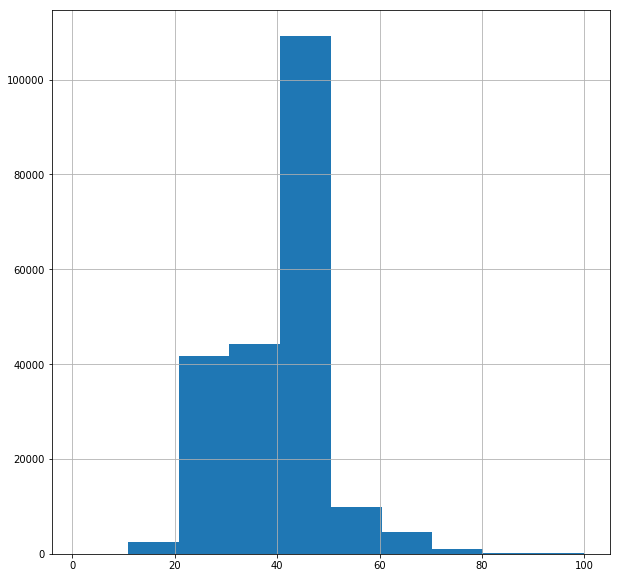

In [74]:
%matplotlib inline
data.age.hist(figsize=(10,10));

Pero en este caso, para el análisis de outliers un gráfico de caja nos proveerá mucha más información:

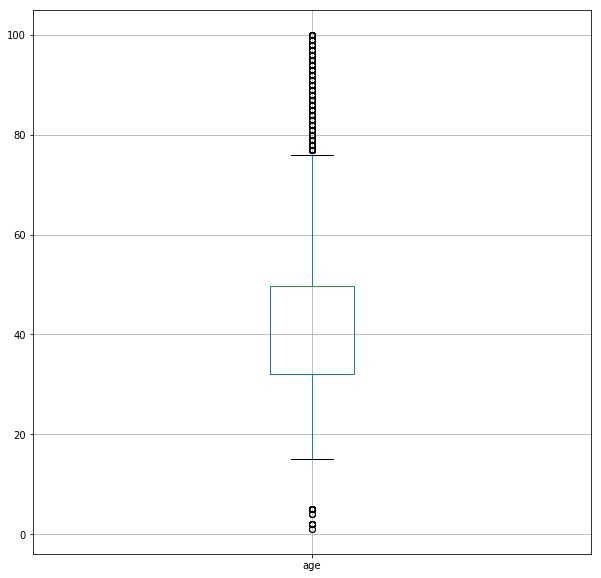

In [75]:
data.boxplot(column='age', figsize=(10,10));

Analizamos los outliers de __age__. Los outliers serán todos los valores que estén más allá de la media más tres veces la desviación estándar.

In [80]:
(data.age.mean() + 3 * data.age.std())

75.11401288707476

In [83]:
#find first and third quartile
q1, q3= np.percentile(data['age'].dropna(),[25,75])
q1, q3
#Find the IQR, which is the difference between third and first quartile
iqr = q3 - q1
iqr
#Find lower and upper bound
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
lower_bound, upper_bound

(5.4974972302149645, 76.17083794964172)

In [84]:
data.query(' age < @lower_bound').age.count()

57

In [85]:
data.query(' age > @upper_bound').age.count()

644

In [76]:
outliers = data[data.age > (data.age.mean() + 3 * data.age.std())]
outliers

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
ixv5186g1h,2010-05-21,2010-05-21 07:00:29,NaT,MALE,95.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
kqf8b3ta98,2010-06-07,2010-06-07 18:46:26,NaT,FEMALE,94.0,basic,0,en,content,google,linked,Web,Mac Desktop,Safari,NDF
77qfjwd8uv,2010-07-15,2010-07-15 20:52:21,2010-08-16,MALE,79.0,basic,2,en,content,facebook,untracked,Web,Windows Desktop,Chrome,US
9lkved7fhg,2010-09-05,2010-09-05 05:01:14,2010-09-05,FEMALE,98.0,basic,3,en,seo,google,untracked,Web,Mac Desktop,Safari,US
souftdfcq1,2010-09-21,2010-09-21 01:20:22,NaT,-unknown-,76.0,basic,3,en,sem-brand,google,untracked,Web,Other/Unknown,-unknown-,NDF
8wxkkbpwuk,2010-09-25,2010-09-25 23:42:41,2010-10-02,FEMALE,87.0,facebook,2,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
g4pymtxkrk,2010-09-26,2010-09-26 23:40:20,2010-09-27,FEMALE,92.0,basic,0,en,sem-non-brand,google,untracked,Web,iPad,Mobile Safari,US
cmaysyaya1,2010-11-28,2010-11-28 21:47:40,2010-12-14,MALE,84.0,basic,2,en,direct,direct,untracked,Web,Mac Desktop,Chrome,other
lp1ddk7ps2,2010-12-17,2010-12-17 01:06:55,NaT,MALE,78.0,basic,2,en,sem-brand,google,untracked,Web,Windows Desktop,IE,NDF


* __TO DO__: ¿Qué deberíamos hacer con estos outliers? ¿Son factibles a una corrección? ¿Los debemos eliminar?

In [86]:
data.age.describe()

count    213451.000000
mean         42.098571
std          11.005147
min           1.000000
25%          32.000000
50%          49.668335
75%          49.668335
max         100.000000
Name: age, dtype: float64

Si quisieramos hacer un análisis más profundo podríamos realizar gŕaficos de caja de las columnas de interés con respecto a otras. En este caso graficamos __age__ dependiendo del __gender__.

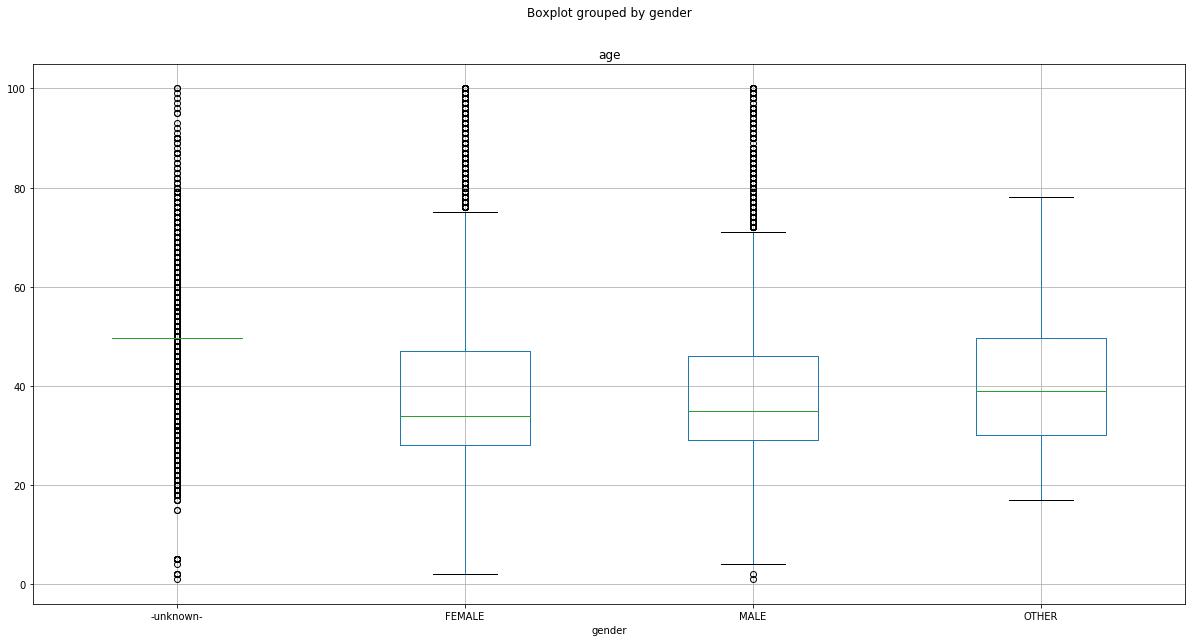

In [87]:
data.boxplot(column='age',by='gender', figsize=(20,10));

* __TO DO__: Repetir el análisis con las demás columnas para poder completar la curación de los datos.

## 11. Evaluar cómo comprimir los datos 

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la velocidad para leerlo que suele ser determinante a la hora de determinar el formato de almacenamiento. Esto es debido a que generalmente los datos se guardan una vez (o con una frecuencia muy baja) pero necesitaremos leerlos constantemente.

## 12. Guardar el set de datos con un nombre informativo

El nombre del dataset original es __data.csv__

In [33]:
#data_cleaned.to_csv("../Datos/data_cleaned.csv")